In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### MNIST IMAGE --> Tensor

In [5]:
transform = transforms.ToTensor()

In [7]:
train_data = datasets.MNIST(root="../Data", train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\train-images-idx3-ubyte.gz to ../Data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\train-labels-idx1-ubyte.gz to ../Data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../Data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../Data\MNIST\raw



C:\Users\gold\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
test_data = datasets.MNIST(root="../Data", train=False, download=True, transform=transform)

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [12]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
type(train_data[0])

tuple

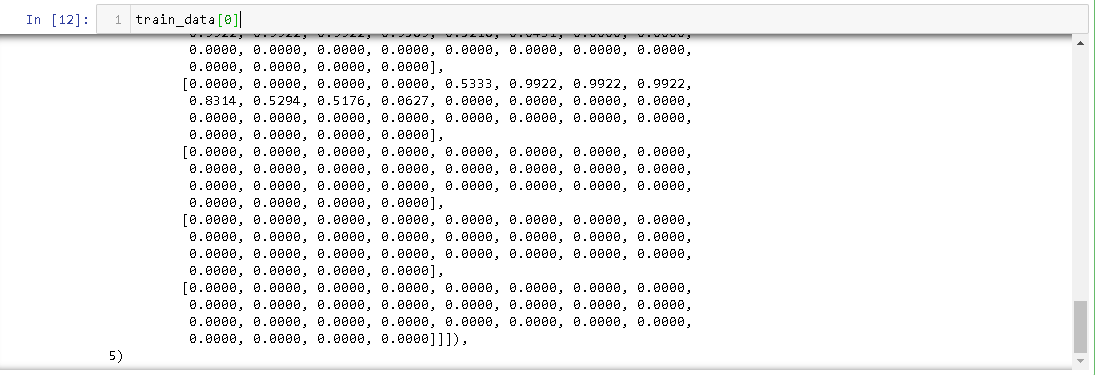

#### as you see above train_data[0] is a tuple, "5" is the label

In [14]:
image,label= train_data[0]

In [15]:
image.shape
# 1 represents grey scale image 

torch.Size([1, 28, 28])

In [16]:
label

5

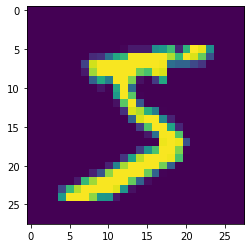

In [22]:
plt.imshow(image.reshape((28,28)))

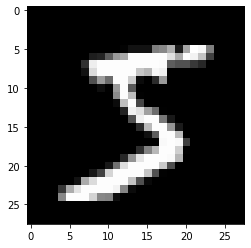

In [21]:
plt.imshow(image.reshape((28,28)), cmap="gray")

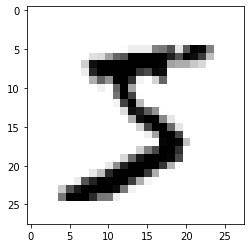

In [23]:
plt.imshow(image.reshape((28,28)), cmap="gist_yarg")

In [24]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [25]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}"))

In [26]:
# First Batch
for images,labels in train_loader:
    break

In [27]:
images.shape # 4D tensor

torch.Size([100, 1, 28, 28])

In [29]:
labels

tensor([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3, 5, 5, 4, 5, 4, 1, 0, 4, 5, 4, 5, 4,
        0, 5, 8, 2, 2, 3, 3, 7, 2, 8, 1, 2, 3, 1, 7, 9, 0, 4, 9, 1, 7, 9, 7, 2,
        6, 5, 5, 8, 5, 0, 4, 0, 0, 4, 9, 2, 6, 0, 8, 4, 1, 8, 5, 2, 0, 3, 3, 4,
        6, 1, 5, 3, 5, 9, 0, 7, 4, 5, 3, 6, 6, 4, 5, 3, 9, 7, 1, 7, 6, 7, 9, 3,
        5, 9, 9, 6])

In [28]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


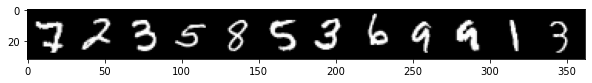

In [30]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC (with high color)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));   # change index order from torch.Size([100, 1, 28, 28]) to (28,28,1)

### Creating the Network

In [31]:
class MultiLayerPerceptron(nn.Module):
    
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        x = self.fc3(X)
        
        return F.log_softmax(X, dim=1) # Multi Class Classification

In [32]:
torch.manual_seed(101)
model= MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [43]:
# total paramater  = 105,214

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [60]:
images.shape # we should change the size [100, 784]

torch.Size([100, 1, 28, 28])

In [61]:
images.view(100,-1).shape

torch.Size([100, 784])

### Training

In [67]:
import time
start = time.time()

# Training

epochs = 10


train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        b = b + 1
        
        # 10 Neurons
        # probabilities per class[0.1, 0.0, .....] --> digit 9 e.g
        
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr+= batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            acc = trn_corr.item() * 100 / (100*b)
            print(f"Epoch {i} batch {b} loss: {loss.item()} accuracy: {acc}")
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
    
    with torch.no_grad():
        
        for b, (X_test, y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
    
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
total = time.time() - start
print(f"Duration: {total / 60} mins")

Epoch 0 batch 200 loss: 0.6117240786552429 accuracy: 70.32
Epoch 0 batch 400 loss: 0.6911846399307251 accuracy: 76.295
Epoch 0 batch 600 loss: 0.6711869835853577 accuracy: 78.82666666666667
Epoch 1 batch 200 loss: 0.6682643890380859 accuracy: 84.98
Epoch 1 batch 400 loss: 0.6295526623725891 accuracy: 84.9175
Epoch 1 batch 600 loss: 0.5552507042884827 accuracy: 85.12833333333333
Epoch 2 batch 200 loss: 0.7112389206886292 accuracy: 86.445
Epoch 2 batch 400 loss: 0.6322680115699768 accuracy: 86.22
Epoch 2 batch 600 loss: 0.28512871265411377 accuracy: 86.335
Epoch 3 batch 200 loss: 0.5170300006866455 accuracy: 87.105
Epoch 3 batch 400 loss: 0.8900696039199829 accuracy: 87.12
Epoch 3 batch 600 loss: 0.5818136930465698 accuracy: 87.095
Epoch 4 batch 200 loss: 0.5147700905799866 accuracy: 87.675
Epoch 4 batch 400 loss: 0.37281009554862976 accuracy: 87.6125
Epoch 4 batch 600 loss: 0.7390569448471069 accuracy: 87.60833333333333
Epoch 5 batch 200 loss: 0.8849212527275085 accuracy: 87.73
Epoch 5 

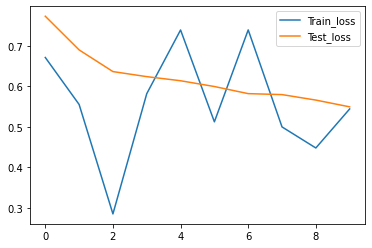

In [69]:
plt.plot(train_losses, label="Train_loss")
plt.plot(test_losses, label="Test_loss")
plt.legend()

In [70]:
train_acc = [t/600 for t in train_correct]
train_acc

[78.82666666666667,
 85.12833333333333,
 86.335,
 87.095,
 87.60833333333333,
 88.05833333333334,
 88.33,
 88.56166666666667,
 88.775,
 88.96166666666667]

In [72]:
test_acc = [t/100 for t in test_correct]
test_acc

[tensor(84.7000),
 tensor(86.3500),
 tensor(86.9500),
 tensor(87.1900),
 tensor(87.7900),
 tensor(88.0200),
 tensor(88.0600),
 tensor(88.1800),
 tensor(88.1300),
 tensor(88.3700)]

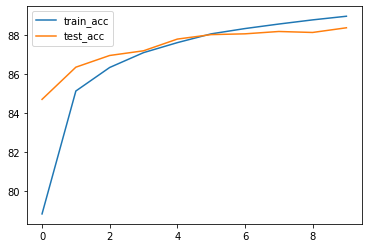

In [73]:
plt.plot(train_acc, label="train_acc")
plt.plot(test_acc, label="test_acc")
plt.legend()

In [74]:
# New Unseen Data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)


In [76]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [80]:
100 * correct.item()/len(test_data)

88.37

In [81]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 973,    0,    3,    0,    0,    2,  787,    1,    1,    1],
       [   0, 1126,    2,    0,    0,    0,    9,   10,    0,    5],
       [   0,    5, 1011,    4,    7,    0,   41,   13,    4,    0],
       [   1,    0,    2,  993,    0,   10,    3,    3,    9,    7],
       [   1,    0,    2,    1,  951,    2,   36,    1,    3,    5],
       [   0,    1,    0,    0,    0,  868,   39,    0,    6,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    4,    3,    3,    1,    2,  985,    3,    0],
       [   4,    3,    8,    5,    2,    3,   40,    2,  944,    1],
       [   1,    0,    0,    4,   19,    6,    1,   13,    4,  986]],
      dtype=int64)

In [82]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

1163

In [83]:
# Display the first 10 index positions
misses[:10]

array([  11,   21,   22,   50,   54,   66,   81,   88,   91,   98],
      dtype=int64)

In [84]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

In [186]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

StopIteration: 